# CSE5ML Lab 6B: TensorFlow for Classification

## Introduction

From previous lectures and labs, many of you have learned how to program with Python and built an intelligent system. In this lab, we will start to learn the most popular framework of neural networks from Google, TensorFlow. 

From this lab, you will learn 
- How to build simple neural network models for binary classifcation. 

Note: TensorFlow is a tool for machine learning. While it contains a wide range of functionality, TensorFlow is mainly designed for deep neural network models. You are suggested to read the tutorials from the [website](https://www.tensorflow.org/tutorials/).

## Program with Tensorflow

Based on what you have learned about regression in last lab, let us try a simple classification task.

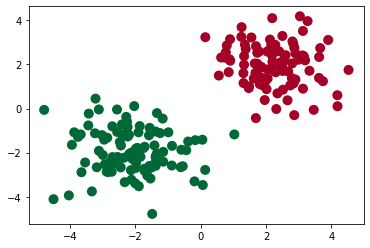

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x0 = np.random.normal(2, 1, (100, 2))      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100,)

x1 = np.random.normal(-2, 1, (100, 2))     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100,)
x = np.vstack((x0, x1))  # Stack arrays in sequence vertically (row wise), shape (200, 2)
y = np.hstack((y0, y1))  # Stack arrays in sequence horizontally (column wise). This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis. shape (200, )

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn') #y0: red, y1: green
plt.show()

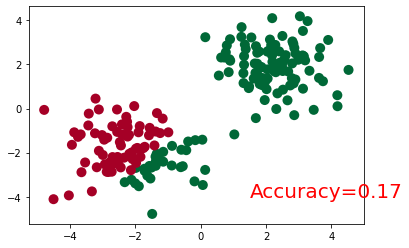

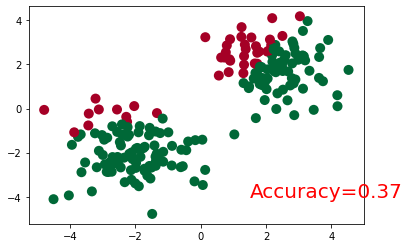

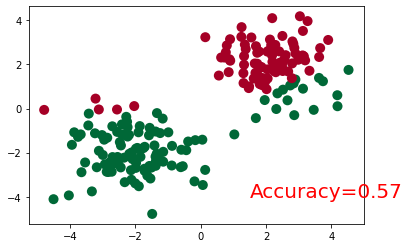

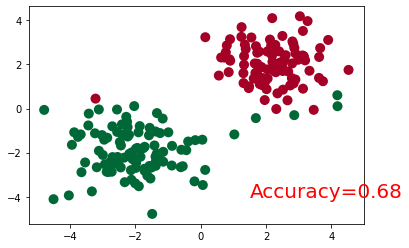

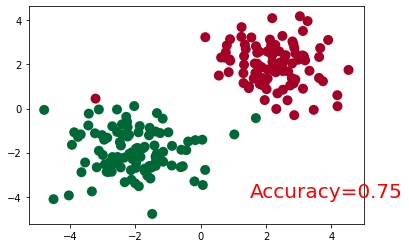

In [9]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.int32, y.shape)       # input y

# neural network layers
l1 = tf.layers.Dense(10, tf.nn.relu)(tf_x)          # hidden layer 10 hidden nodes
output = tf.layers.Dense(2)(l1)                     # output layer 2 nodes (one for each class)

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)           # compute loss for classfication tasks

# calculate accuracy
# tf.metrics.accuracy(): return (acc, update_op), update_op is an operation that calculate and update accuracy 
# tf.squeeze(): Removes dimensions of size 1 from the shape of a tensor.
# tf.argmax(): Returns the index with the largest value across axes of a tensor. axis=1: across column
accuracy = tf.metrics.accuracy(
    labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1))[1]             

# Set gradient descent as the optimization algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05) # you can try change lr here
train_op = optimizer.minimize(loss)

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())   # tf.local_variables_initializer() is for initializing the local variables created in tf.metrics.accuracy(), detailed reasons can be found here: https://stackoverflow.com/questions/46409626/how-to-properly-use-tf-metrics-accuracy
sess.run(init_op)     # initialize var in graph

plt.ion()   # something about plotting
for step in range(10): 
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()

Go back and change the `range(10)` into `range(50)` . Check the accuracy again and see the difference. 
Update the neural networks structure (number of hidden nodes, number of hidden layers) and try again.